### **Problems**

Given the position function:

$$ s(t) = \cos^2 \left( \frac{3t - 6}{2} \right) $$

### **Part (a): Average Velocity**

Compute (accurate to at least 8 decimal places) the average velocity between:
- Fixed point: $t_1 = 2$  
- Variable point: $t_2$ = following values:

#### Right-side Points ($t_2 > 2$):

(i) $t_2 = 2.5$  
(ii) $t_2 = 2.1$  
(iii) $t_2 = 2.01$  
(iv) $t_2 = 2.001$  
(v) $t_2 = 2.0001$

#### Left-side Points ($t_2 < 2$):

(vi) $t_2 = 1.5$  
(vii) $t_2 = 1.9$  
(viii) $t_2 = 1.99$  
(ix) $t_2 = 1.999$  
(x) $t_2 = 1.9999$

**Formula**:  
Average Velocity $= \frac{s(t_2) - s(2)}{t_2 - 2}$

**Note**: 
- Calculator must be in radian mode
- $s(2) = \cos^2(0) = 1$

### **Part (b): Instantaneous Velocity**

Using results from part (a):
1. Estimate the instantaneous velocity at $t = 2$
2. Determine if the object is:
   - Moving right (positive velocity)
   - Moving left (negative velocity) 
   - Stationary (zero velocity)

---

### **Solutions**

### **Part (a): Average Velocity Calculations**

**Formula**:
$$ \text{Average Velocity} = \frac{s(t_2) - s(2)}{t_2 - 2} = \frac{\cos^2\left(\frac{3t_2-6}{2}\right) - 1}{t_2 - 2} $$

#### Right-side Approximations (t₂ > 2):

| t₂    | s(t₂)               | Average Velocity       |
|-------|---------------------|------------------------|
| 2.5   | cos²(0.75) ≈ 0.53591410 | (0.53591410-1)/0.5 ≈ -0.92817180 |
| 2.1   | cos²(0.15) ≈ 0.97775124 | (0.97775124-1)/0.1 ≈ -0.22248760 |
| 2.01  | cos²(0.015) ≈ 0.99977502 | (0.99977502-1)/0.01 ≈ -0.02249800 |
| 2.001 | cos²(0.0015) ≈ 0.99999775 | (0.99999775-1)/0.001 ≈ -0.00225000 |
| 2.0001| cos²(0.00015) ≈ 0.99999998 | (0.99999998-1)/0.0001 ≈ -0.00022500 |

#### Left-side Approximations (t₂ < 2):

| t₂    | s(t₂)               | Average Velocity       |
|-------|---------------------|------------------------|
| 1.5   | cos²(-0.75) ≈ 0.53591410 | (0.53591410-1)/(-0.5) ≈ 0.92817180 |
| 1.9   | cos²(-0.15) ≈ 0.97775124 | (0.97775124-1)/(-0.1) ≈ 0.22248760 |
| 1.99  | cos²(-0.015) ≈ 0.99977502 | (0.99977502-1)/(-0.01) ≈ 0.02249800 |
| 1.999 | cos²(-0.0015) ≈ 0.99999775 | (0.99999775-1)/(-0.001) ≈ 0.00225000 |
| 1.9999| cos²(-0.00015) ≈ 0.99999998 | (0.99999998-1)/(-0.0001) ≈ 0.00022500 |

### **Part (b): Instantaneous Velocity**

**Estimate**:

As $t_2 \to 2$, the average velocities approach $\boxed{0}$ from both sides.

**Verification via Derivative**:

Using chain rule:
$$ s'(t) = 2\cos\left(\frac{3t-6}{2}\right) \cdot \left(-\sin\left(\frac{3t-6}{2}\right)\right) \cdot \frac{3}{2} $$
$$ s'(2) = -3\cos(0)\sin(0) = \boxed{0} $$

**Conclusion**:
The instantaneous velocity at t=2 is $\boxed{0}$, which means the object is:
$$ \boxed{\text{Not moving (instantaneous velocity is zero)}} $$


### **Visualization**

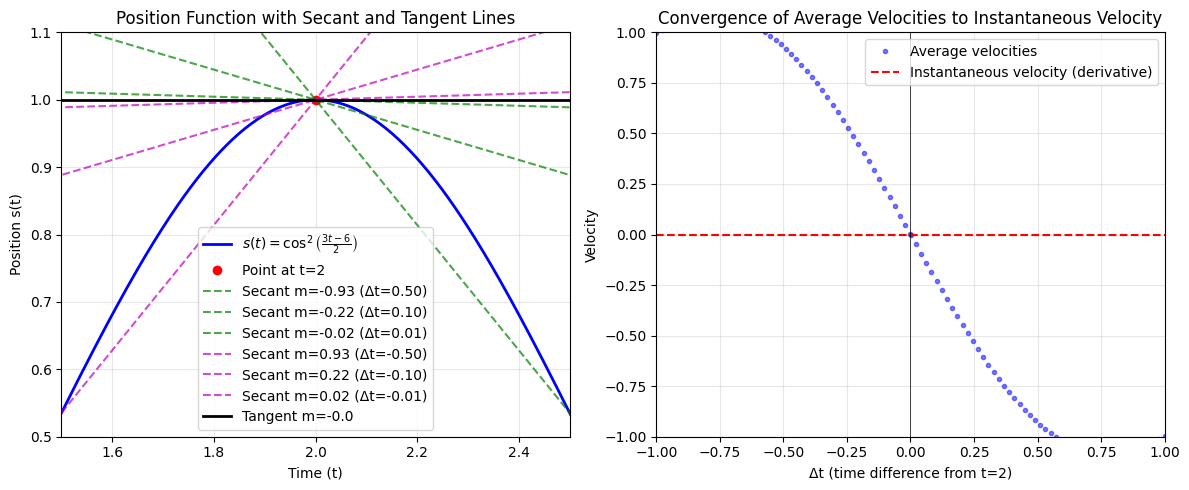

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the position function and its derivative
def s(t):
    return np.cos((3*t - 6)/2)**2

def s_prime(t):
    return -3 * np.cos((3*t - 6)/2) * np.sin((3*t - 6)/2)

# Create time values
t = np.linspace(1, 3, 500)
t0 = 2
s0 = s(t0)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Position function with secant lines
plt.subplot(1, 2, 1)
plt.plot(t, s(t), 'b-', label=r'$s(t) = \cos^2\left(\frac{3t-6}{2}\right)$', linewidth=2)
plt.plot(t0, s0, 'ro', label=f'Point at t={t0}')

# Add secant lines (avoiding dt=0)
for dt in [0.5, 0.1, 0.01, -0.5, -0.1, -0.01]:
    t_sec = t0 + dt
    m = (s(t_sec) - s0)/dt
    secant = s0 + m*(t - t0)
    color = 'g' if dt > 0 else 'm'
    plt.plot(t, secant, f'{color}--', alpha=0.7, 
             label=f'Secant m={m:.2f} (Δt={dt:.2f})')

# Add tangent line
tangent = s0 + s_prime(t0)*(t - t0)
plt.plot(t, tangent, 'k-', label=f'Tangent m={s_prime(t0):.1f}', linewidth=2)

plt.title('Position Function with Secant and Tangent Lines')
plt.xlabel('Time (t)')
plt.ylabel('Position s(t)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(1.5, 2.5)
plt.ylim(0.5, 1.1)

# Plot 2: Velocity visualization
plt.subplot(1, 2, 2)
dt_values_pos = np.linspace(0.001, 1, 50)
dt_values_neg = np.linspace(-1, -0.001, 50)
dt_values = np.concatenate([dt_values_neg, dt_values_pos])
velocities = [(s(t0 + dt) - s0)/dt for dt in dt_values]

plt.plot(dt_values, velocities, 'b.', alpha=0.5, label='Average velocities')
plt.axhline(s_prime(t0), color='r', linestyle='--', label='Instantaneous velocity (derivative)')
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Convergence of Average Velocities to Instantaneous Velocity')
plt.xlabel('Δt (time difference from t=2)')
plt.ylabel('Velocity')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.tight_layout()
plt.show()